In [1]:
#pip install --upgrade pip

In [2]:
#conda update -n base -c defaults conda

# importing Library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import json
import seaborn as sns

In [5]:
# get train data
import pandas as pd
from tensorflow.keras.preprocessing import image
df_train = pd.read_csv('dataset_hmc.csv')
df_test = pd.read_csv('dataset_hmc_test.csv')
df_train.head()

,Unnamed: 0,id,label,text,img
0,0,42953,0,its their character not their color that matters,barbershop book_jacket prison dumbbell panpipe
1,1,23058,0,don't be afraid to love again everyone is not ...,suit Windsor_tie groom bassoon academic_gown
2,2,13894,0,putting bows on your pet,Egyptian_cat tiger_cat tabby Siamese_cat wind...
3,3,37408,0,i love everything and everybody! except for sq...,Rottweiler kelpie Doberman Labrador_retriever...
4,4,82403,0,"everybody loves chocolate chip cookies, even h...",military_uniform suit bow_tie academic_gown b...


In [6]:
df_test.head()

,Unnamed: 0,id,text,img
0,0,16395,handjobs sold seperately,wig hair_spray jersey hand_blower bookshop
1,1,37405,introducing fidget spinner for women,washer binoculars vending_machine coffee_mug ...
2,2,94180,happy pride month let's go beat up lesbians,sarong maillot wig gown bathing_cap
3,3,54321,laughs in [majority of u.s crime rate],comic_book Band_Aid web_site dumbbell cellula...
4,4,97015,finds out those 72 virgins.. are goats,barbershop bubble barber_chair neck_brace com...


In [101]:
import numpy as np
from tensorflow.keras.preprocessing import image
pd.set_option('display.max_colwidth', None)

In [8]:
for i in range(df_train.shape[0]):
        df_train["text"][i] = df_train["text"][i] + " " + df_train["img"][1]

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
df_train["text"]

0       its their character not their color that matte...
1       don't be afraid to love again everyone is not ...
2       putting bows on your pet  suit Windsor_tie gro...
3       i love everything and everybody! except for sq...
4       everybody loves chocolate chip cookies, even h...
                              ...                        
8495    nobody wants to hang auschwitz me  suit Windso...
8496    when god grants you a child after 20 years of ...
8497    gays on social media: equality! body positivit...
8498    having a bad day? you could be a siamese twin ...
8499    i hate muslims too they take their religion to...
Name: text, Length: 8500, dtype: object

In [10]:
df_train.head()

,Unnamed: 0,id,label,text,img
0,0,42953,0,its their character not their color that matte...,barbershop book_jacket prison dumbbell panpipe
1,1,23058,0,don't be afraid to love again everyone is not ...,suit Windsor_tie groom bassoon academic_gown
2,2,13894,0,putting bows on your pet suit Windsor_tie gro...,Egyptian_cat tiger_cat tabby Siamese_cat wind...
3,3,37408,0,i love everything and everybody! except for sq...,Rottweiler kelpie Doberman Labrador_retriever...
4,4,82403,0,"everybody loves chocolate chip cookies, even h...",military_uniform suit bow_tie academic_gown b...


In [11]:
# train valid split on initial training set
from sklearn.model_selection import train_test_split

y = df_train['label']
df_train, df_test = train_test_split(df_train, test_size=0.15, random_state=42, stratify=y) # stratify is used because dataset is imbalanced it is used to dataset is split into equal rows of each classes
y = df_test['label']
df_val, df_test = train_test_split(df_test, test_size=0.95, random_state=42, stratify=y)
del y

print('Valid:', df_val.shape[0])
print('Train:', df_train.shape[0])

Valid: 63
Train: 7225


In [12]:
print(df_train["text"][1])

don't be afraid to love again everyone is not like your ex  suit Windsor_tie groom bassoon academic_gown


In [13]:
#!pip install inflect

In [14]:
#conda install -c conda-forge inflect

In [15]:
import os
import re, string, unicodedata
import nltk
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

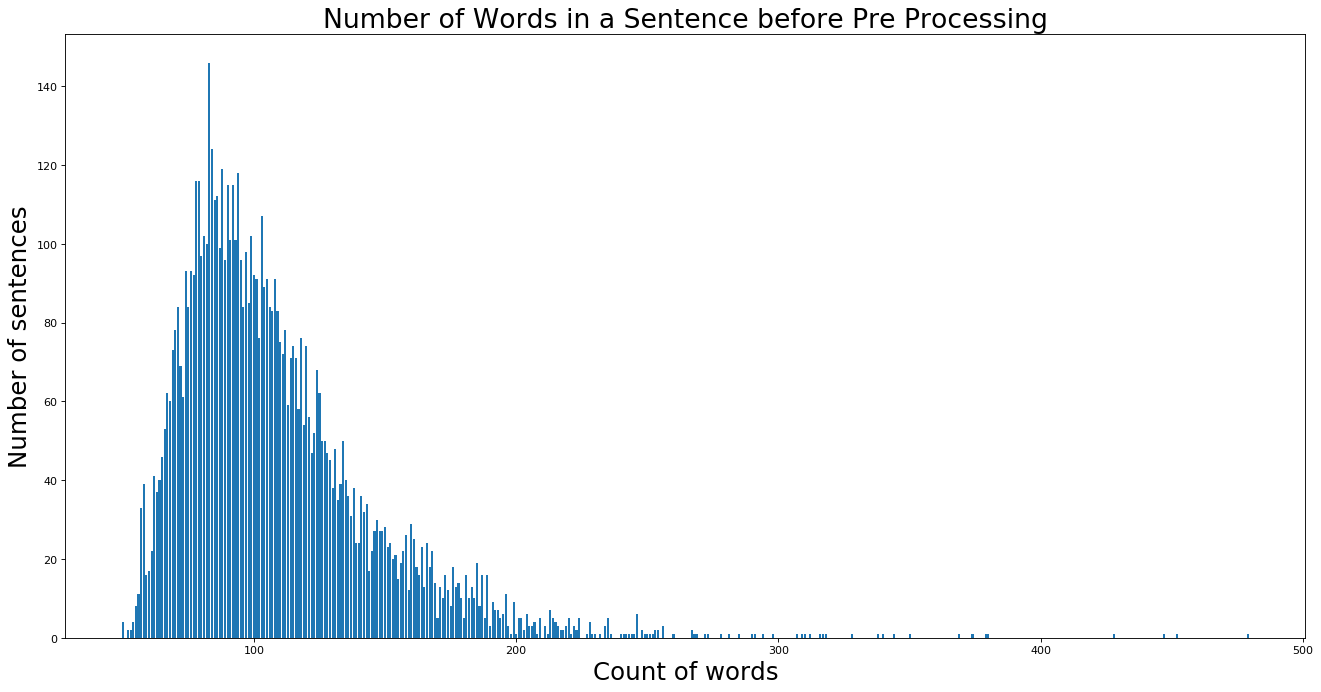

In [16]:
# Word length distribution in train set before preprocessing
from collections import Counter
import matplotlib.pyplot as plt

lengths = []
for text in df_train.text:
    lengths.append(len(text))
c = Counter(lengths)
plt.figure(figsize=(20, 10), dpi=80)
plt.bar([i for i in c.keys()], c.values())
plt.title('Number of Words in a Sentence before Pre Processing',size=24)
plt.xlabel('Count of words',size=22)
plt.ylabel('Number of sentences',size=22)
plt.show()

In [17]:
# Without Preprocessing

df_train['text_cleaned'] = df_train['text']
df_test['text_cleaned'] = df_test['text']
df_val['text_cleaned'] = df_val['text']

In [18]:
df_train.head()

,Unnamed: 0,id,label,text,img,text_cleaned
1856,1856,56938,0,anne frank passed away february 1945 suit Win...,book_jacket pajama bookshop comic_book theate...,anne frank passed away february 1945 suit Win...
542,542,51734,1,when you're shooting up the school and the cop...,cup coffee_mug pencil_sharpener toyshop slot,when you're shooting up the school and the cop...
4798,4798,69534,0,once you go black you deserve it suit Windsor...,quill lab_coat library restaurant crossword_p...,once you go black you deserve it suit Windsor...
4232,4232,56741,0,any girls a squirter if you sever an artery s...,book_jacket suit Loafer jean dingo,any girls a squirter if you sever an artery s...
2784,2784,25097,1,damn chewbacca ewoks are our friends suit Win...,cellular_telephone hand-held_computer digital...,damn chewbacca ewoks are our friends suit Win...


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
# import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [20]:
#!pip install transformers

In [21]:
import transformers as ppb

In [22]:
#pip install --upgrade torch

In [23]:
# For DistilBERT:
# model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## for BERT 
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights) #tokenizer form hugging face
bert_model = model_class.from_pretrained(pretrained_weights)# take  all previsous layers hidden or o/p

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [24]:
 print(df_train.groupby('label').size())

label
0    4632
1    2593
dtype: int64


In [25]:
 print(df_test.groupby('label').size())

label
0    778
1    434
dtype: int64


In [26]:
tokenize = tokenizer_class.from_pretrained(pretrained_weights)
tokenized = df_train['text_cleaned'].apply((lambda x: tokenize.encode(str(x), add_special_tokens=True))) 

In [27]:
# Finding max word length

max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)
max_len

98

In [28]:
train_features = np.array([[]])
test_features = np.array([[]])
train_labels = np.array([])
test_labels = np.array([])

In [29]:
BATCH_SIZE = 1125

for i in range(0, len(df_train), BATCH_SIZE):

    df = df_train[ i : i+BATCH_SIZE ]

    # Tokenization and converting (encode) in numerical and add ClS to find begnning of line
    tokenized = df['text_cleaned'].apply((lambda x: tokenize.encode(str(x), add_special_tokens=True)))

    # Append zeros for padding (because require same shape and same length for better efficency
    padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

    # Extract Attention Masks(tell which token to ignore and to process in form of 0 and 1 for bert model)
    attention_mask = np.where(padded != 0, 1, 0)

    # Here we just convert the data to tensors
    input_ids = torch.tensor(padded)  
    attention_mask = torch.tensor(attention_mask)

    # no gradient while forwarding propagation
    with torch.no_grad():
        last_hidden_states = bert_model(input_ids, attention_mask=attention_mask)

    # Extracting features of the CLS tokens
    features = last_hidden_states[0][:,0,:].numpy()

    # Extracting Labels
    labels = df['label'].values
    labels[labels>0] = 1

    # Test Train Split
    train_features_2, test_features_2, train_labels_2, test_labels_2 = train_test_split(features, labels, train_size=0.80)

    # Appending the data to the main arrays
    if len(train_labels) == 0 :
        train_features = train_features_2
        test_features = test_features_2
        train_labels = train_labels_2
        test_labels = test_labels_2
    else:
        train_features = np.concatenate((train_features,train_features_2))
        test_features = np.concatenate((test_features,test_features_2))
        train_labels = np.concatenate((train_labels,train_labels_2))
        test_labels = np.concatenate((test_labels,test_labels_2))
    print(train_features.shape)
    print(test_features.shape)
    print(train_labels.shape)
    print(test_labels.shape)

(900, 768)
(225, 768)
(900,)
(225,)
(1800, 768)
(450, 768)
(1800,)
(450,)
(2700, 768)
(675, 768)
(2700,)
(675,)
(3600, 768)
(900, 768)
(3600,)
(900,)
(4500, 768)
(1125, 768)
(4500,)
(1125,)
(5400, 768)
(1350, 768)
(5400,)
(1350,)
(5780, 768)
(1445, 768)
(5780,)
(1445,)


In [30]:
last_hidden_states

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-1.2083e-01,  2.5280e-01, -1.5992e-01,  ..., -4.5361e-01,
           3.3957e-01,  2.0007e-01],
         [ 1.0855e+00,  6.3546e-01, -4.6836e-01,  ..., -5.7752e-01,
           7.7785e-01, -6.3170e-01],
         [ 9.2344e-01,  2.8790e-02,  1.9433e-01,  ..., -4.5141e-01,
           3.9961e-01, -3.5499e-01],
         ...,
         [ 1.8418e-01,  9.7631e-02,  3.2948e-01,  ..., -4.9974e-01,
          -5.3036e-02, -3.8704e-02],
         [ 1.9814e-01,  5.5020e-02,  3.0089e-01,  ..., -5.9427e-01,
          -5.3371e-02, -1.4859e-02],
         [ 1.0874e-01, -6.6596e-03,  3.3085e-01,  ..., -5.3570e-01,
          -9.7332e-02, -4.9068e-03]],

        [[-1.2264e-01,  1.5454e-01,  6.4965e-02,  ..., -4.5976e-01,
           1.8393e-01,  3.4176e-01],
         [ 1.5211e-01, -1.6466e-01,  2.2399e-01,  ..., -5.1684e-01,
          -1.2956e-01, -8.7190e-02],
         [ 2.6497e-02, -5.5498e-01,  5.3476e-01,  ..., -5.0181e-01,
          -4.

In [31]:
features

array([[-0.12082504,  0.252804  , -0.15992258, ..., -0.4536092 ,
         0.33956665,  0.20007336],
       [-0.12264464,  0.15453985,  0.06496531, ..., -0.4597603 ,
         0.18392542,  0.34175682],
       [-0.1153533 , -0.00430722,  0.02988526, ..., -0.37116805,
        -0.07342135,  0.08615599],
       ...,
       [-0.07112505,  0.0087231 ,  0.0072221 , ..., -0.25759393,
         0.10804518,  0.3851583 ],
       [-0.23970556,  0.07971995,  0.06398001, ..., -0.2811936 ,
         0.18982455,  0.29249913],
       [-0.2997635 ,  0.08232988, -0.35485753, ..., -0.4203696 ,
         0.13307743,  0.45058644]], dtype=float32)

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
plt.style.use('seaborn')

In [33]:
def print_metrices(cm):
    cm = np.array(cm, dtype=np.float)
    class_names = ['Not Hateful','Hateful']
    matplotlib.rcParams.update({'font.size': 20})
    plt.xlabel("Actual Value", fontsize=18)
    plt.ylabel('Predicted Value', fontsize=18)
    matplotlib.rcParams.update({'xtick.labelsize': 16})
    matplotlib.rcParams.update({'ytick.labelsize': 16})
    ax = sns.heatmap(cm,annot = True,xticklabels=class_names, yticklabels=class_names, cmap="YlGnBu", fmt='g')
    ax.set(xlabel='True Values', ylabel='Predicted Values')
    plt.show()

In [34]:
parameters = {'C': np.linspace(0.01, 0.1, 1)}
grid_search = GridSearchCV(LogisticRegression(), parameters)
grid_search.fit(train_features, train_labels)

print('best parameters: ', grid_search.best_params_)
print('best scores: ', grid_search.best_score_)

best parameters:  {'C': 0.01}
best scores:  0.6958477508650519


In [35]:
train_features[0]

array([-4.06914979e-01,  5.41086718e-02,  1.05161533e-01, -4.00826037e-01,
        1.71939954e-02, -1.03694707e-01,  2.52143025e-01,  1.34384498e-01,
       -2.66467780e-01, -4.08681110e-02, -2.31195278e-02, -4.09738049e-02,
        3.02528858e-01,  6.35350049e-02, -5.38065471e-02,  4.15823162e-01,
       -2.75826395e-01,  5.44641554e-01,  2.50211239e-01, -1.93434000e-01,
       -4.22539473e-01, -7.58114338e-01,  1.27576098e-01,  1.53138906e-01,
        2.54757196e-01, -3.47958505e-01, -3.04366220e-02,  1.79245681e-01,
       -3.51811647e-02, -6.48044795e-02,  2.40067765e-01,  1.30364001e-02,
        3.78940523e-01, -8.84242132e-02,  4.57266986e-01, -3.07052016e-01,
        5.04447281e-01, -5.67349494e-01,  4.12024707e-01, -1.41347706e-01,
       -2.85086900e-01,  1.14004508e-01,  8.80946994e-01, -3.32812876e-01,
        1.57855421e-01, -1.99877322e-01, -2.62939310e+00,  7.63740507e-04,
        1.76507637e-01, -7.12177455e-02,  4.03278172e-01, -2.46489525e-01,
        7.84898773e-02,  

In [36]:
print(train_labels)

[0 0 0 ... 0 0 0]


In [37]:
type(train_features[0])

numpy.ndarray

# Logistic Regression

In [38]:
lr_clf = LogisticRegression(solver='liblinear', C=0.01)# c is a a regulization typer hyperparameter 

In [39]:
lr_clf.fit(train_features, train_labels)

LogisticRegression(C=0.01, solver='liblinear')

In [40]:
lr_clf.score(test_features, test_labels)

0.7231833910034602

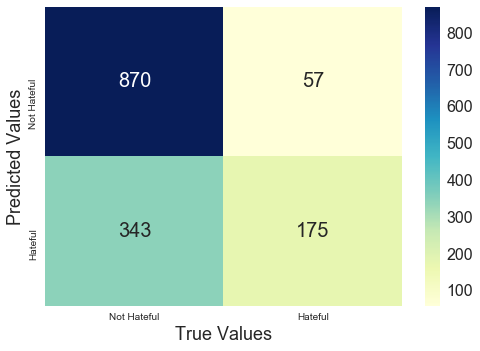

In [41]:
pred_labels = lr_clf.predict(test_features)
conf_matrix = confusion_matrix(test_labels, pred_labels)
print_metrices(conf_matrix)

In [42]:
pred_prob = lr_clf.predict_proba(test_features)
fpr, tpr, thresh = roc_curve(test_labels, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_labels))]
p_fpr, p_tpr, _ = roc_curve(test_labels, random_probs, pos_label=1)
auc_score = roc_auc_score(test_labels, pred_prob[:,1])
print(auc_score)

0.7174199164490426


In [43]:
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.72      0.94      0.81       927
           1       0.75      0.34      0.47       518

    accuracy                           0.72      1445
   macro avg       0.74      0.64      0.64      1445
weighted avg       0.73      0.72      0.69      1445



In [44]:
pred_temp = pred_prob[:,1]
pred_temp[pred_temp >= 0.44] = 1
pred_temp[pred_temp < 0.44] = 0
score1 = (pred_temp == test_labels).sum() / len(test_labels)
print('Accuracy with shifted center: ', score1)

Accuracy with shifted center:  0.7231833910034602


In [45]:
""""grid_search = GridSearchCV(SVC(), parameters,cv=5)
grid_search.fit(train_features, train_labels)

print('best parameters: ', grid_search.best_params_)
print('best scores: ', grid_search.best_score_)"""

'"grid_search = GridSearchCV(SVC(), parameters,cv=5)\ngrid_search.fit(train_features, train_labels)\n\nprint(\'best parameters: \', grid_search.best_params_)\nprint(\'best scores: \', grid_search.best_score_)'

# SVM

In [46]:
svm = SVC(kernel="linear", C=0.025,random_state=101) # because our data is linearly sperable 
svm.probability=True
svm.fit(train_features, train_labels)
svm.score(test_features, test_labels)

0.7238754325259515

In [47]:
pred_prob = svm.predict_proba(test_features)
fpr, tpr, thresh = roc_curve(test_labels, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_labels))]
p_fpr, p_tpr, _ = roc_curve(test_labels, random_probs, pos_label=1)
auc_score = roc_auc_score(test_labels, pred_prob[:,1])
print(auc_score)

0.7200407758660186


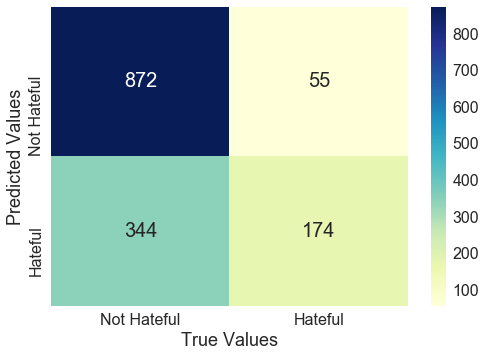

In [48]:
pred_labels = svm.predict(test_features)
conf_matrix = confusion_matrix(test_labels, pred_labels)
print_metrices(conf_matrix)

In [49]:
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.72      0.94      0.81       927
           1       0.76      0.34      0.47       518

    accuracy                           0.72      1445
   macro avg       0.74      0.64      0.64      1445
weighted avg       0.73      0.72      0.69      1445



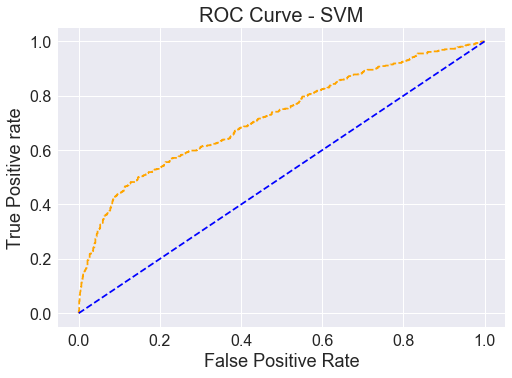

In [50]:
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC Curve - SVM', fontsize=20)
# x label
plt.xlabel('False Positive Rate', fontsize=18)
# y label
plt.ylabel('True Positive rate',fontsize=18)

# plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1,
                            random_state=101,max_features=None, min_samples_leaf=30)
rfm.fit(train_features, train_labels)

RandomForestClassifier(max_features=None, min_samples_leaf=30, n_estimators=70,
                       n_jobs=-1, oob_score=True, random_state=101)

In [52]:
pred_prob = rfm.predict_proba(test_features)
auc_score = roc_auc_score(test_labels, pred_prob[:,1])
print(auc_score)

0.656093680365525


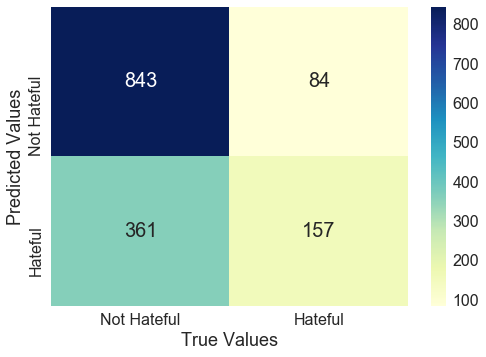

In [53]:
pred_labels = rfm.predict(test_features)
conf_matrix = confusion_matrix(test_labels, pred_labels)
print_metrices(conf_matrix)

In [54]:
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       927
           1       0.65      0.30      0.41       518

    accuracy                           0.69      1445
   macro avg       0.68      0.61      0.60      1445
weighted avg       0.68      0.69      0.66      1445



# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_features, train_labels)

KNeighborsClassifier()

In [56]:
pred_prob = knn.predict_proba(test_features)
auc_score = roc_auc_score(test_labels, pred_prob[:,1])
print(auc_score)

0.6181000695563803


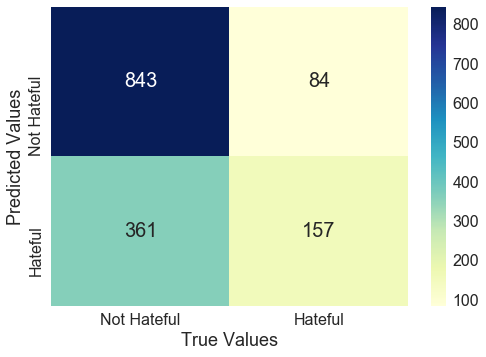

In [57]:
pred_labels = rfm.predict(test_features)
conf_matrix = confusion_matrix(test_labels, pred_labels)
print_metrices(conf_matrix)

In [58]:
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       927
           1       0.65      0.30      0.41       518

    accuracy                           0.69      1445
   macro avg       0.68      0.61      0.60      1445
weighted avg       0.68      0.69      0.66      1445



# ANN

In [59]:
from tensorflow.keras import regularizers

In [60]:
##tried different regularizer to prevent overfitting 
#layers.Dropout(0.2),
#kernel_regularizer
#bias regulalizer
#simply cutting epochs lead to under training K folds

In [61]:
ann = keras.Sequential([
   # keras.layers.Dense(32, activation='relu', input_dim=train_features.shape[1],kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
ann.fit(train_features, train_labels, epochs=100, batch_size=32, verbose=1) #common to use batch sizes that are powers of 2, such as 32, 64, 128, etc.

# Evaluate the model on the test set
test_loss, test_acc = ann.evaluate(test_features, test_labels)

Epoch 1/100
181/181 [==============================] - 3s 1ms/step - loss: 0.6405 - accuracy: 0.6649
Epoch 2/100
181/181 [==============================] - 0s 1ms/step - loss: 0.6089 - accuracy: 0.6962
Epoch 3/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.7012
Epoch 4/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5855 - accuracy: 0.7048
Epoch 5/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5816 - accuracy: 0.7074
Epoch 6/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.7095
Epoch 7/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5775 - accuracy: 0.7090
Epoch 8/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5821 - accuracy: 0.7085
Epoch 9/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5713 - accuracy: 0.7170
Epoch 10/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5706 - accura

181/181 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 0.7405
Epoch 82/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5415 - accuracy: 0.7398
Epoch 83/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy: 0.7412
Epoch 84/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5420 - accuracy: 0.7400
Epoch 85/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5349 - accuracy: 0.7427
Epoch 86/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.7389
Epoch 87/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5353 - accuracy: 0.7388
Epoch 88/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5426 - accuracy: 0.7389
Epoch 89/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5391 - accuracy: 0.7401
Epoch 90/100
181/181 [==============================] - 0s 1ms/step - loss: 0.5378 - accuracy: 

In [62]:
pred_prob = ann.predict(test_features)
auc_score = roc_auc_score(test_labels, pred_prob)
print(auc_score)

0.714755323978625


In [63]:
pred_prob[pred_temp >= 0.44] = 1
pred_prob[pred_temp < 0.44] = 0

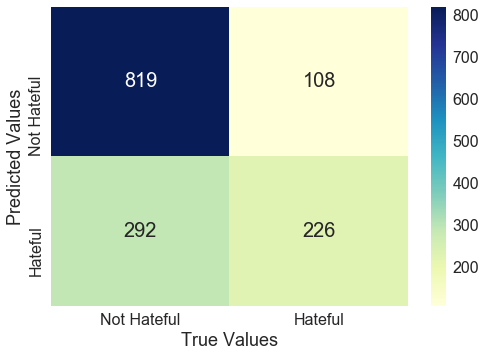

In [64]:
conf_matrix = confusion_matrix(test_labels, pred_prob)
print_metrices(conf_matrix)

In [65]:
print(classification_report(test_labels, pred_prob))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       927
           1       0.68      0.44      0.53       518

    accuracy                           0.72      1445
   macro avg       0.71      0.66      0.67      1445
weighted avg       0.72      0.72      0.71      1445



In [66]:
train_features.shape

(5780, 768)

# LSTM

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


# define the input shape for the LSTM layer
input_shape = (1, 768)# timestep,input_dim

# create the model
lstm = Sequential()

# add the LSTM layer
lstm.add(LSTM(64, input_shape=input_shape))

# add the output layer with sigmoid activation for binary classification
lstm.add(Dense(1, activation='sigmoid'))

# compile the model
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# print the summary of the model architecture
lstm.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                213248    
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 213,313
Trainable params: 213,313
Non-trainable params: 0
_________________________________________________________________


In [68]:
 test_features_2, y_val_features, test_labels_2, y_val_labels = train_test_split(test_features, test_labels, train_size=0.50)

In [69]:
train_features_reshaped = np.reshape(train_features, (-1, 1, 768)) # for 3d shape

In [70]:
y_val_features.shape

(723, 768)

In [71]:
y_val_features_3d = np.reshape(y_val_features, (y_val_features.shape[0], 1, y_val_features.shape[1]))

In [72]:
y_val_features_3d

array([[[-0.15908617,  0.15995473, -0.16116822, ..., -0.3219047 ,
         -0.09377687,  0.11291344]],

       [[-0.2143948 ,  0.06582463,  0.15222482, ..., -0.4319887 ,
          0.11868627,  0.23598279]],

       [[-0.2538715 ,  0.12084133, -0.07965237, ..., -0.4764318 ,
          0.19745684,  0.31613365]],

       ...,

       [[-0.2058237 ,  0.14735907,  0.08931598, ..., -0.47703782,
          0.0909949 ,  0.08280648]],

       [[-0.12743652, -0.02449325, -0.18267286, ..., -0.4419318 ,
          0.06599125,  0.18560684]],

       [[-0.4500478 , -0.07149757, -0.05361588, ..., -0.2081987 ,
          0.07120012,  0.2046469 ]]], dtype=float32)

In [73]:
train_features_reshaped.shape

(5780, 1, 768)

In [74]:
lstm.fit(train_features_reshaped, train_labels, epochs=8, batch_size=32, validation_data=(y_val_features_3d, y_val_labels))

Epoch 1/8
181/181 [==============================] - 4s 5ms/step - loss: 0.6228 - accuracy: 0.6633 - val_loss: 0.5945 - val_accuracy: 0.7082
Epoch 2/8
181/181 [==============================] - 1s 3ms/step - loss: 0.5884 - accuracy: 0.6931 - val_loss: 0.6022 - val_accuracy: 0.6999
Epoch 3/8
181/181 [==============================] - 1s 3ms/step - loss: 0.5840 - accuracy: 0.6998 - val_loss: 0.5695 - val_accuracy: 0.7206
Epoch 4/8
181/181 [==============================] - 1s 3ms/step - loss: 0.5746 - accuracy: 0.7019 - val_loss: 0.5646 - val_accuracy: 0.7178
Epoch 5/8
181/181 [==============================] - 1s 3ms/step - loss: 0.5629 - accuracy: 0.7180 - val_loss: 0.5832 - val_accuracy: 0.6957
Epoch 6/8
181/181 [==============================] - 1s 3ms/step - loss: 0.5595 - accuracy: 0.7227 - val_loss: 0.5630 - val_accuracy: 0.7206
Epoch 7/8
181/181 [==============================] - 1s 3ms/step - loss: 0.5513 - accuracy: 0.7189 - val_loss: 0.5649 - val_accuracy: 0.7192
Epoch 8/8
181

In [75]:
test_features.shape

(1445, 768)

In [76]:
test_features_reshape=np.reshape(test_features_2, (-1, 1, 768))

In [77]:
test_loss, test_acc = lstm.evaluate(test_features_reshape, test_labels_2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

23/23 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.7368
Test loss: 0.57024085521698
Test accuracy: 0.7368420958518982


In [78]:
pred_label=lstm.predict(test_features_reshape)

In [79]:
auc_score = roc_auc_score(test_labels_2, pred_label)

# print AUC score
print("AUC Score:", auc_score)

AUC Score: 0.7219271781318306


In [80]:
pred_label[pred_label >= 0.5] = 1
pred_label[pred_label < 0.5] = 0

In [81]:
print(classification_report(test_labels_2, pred_label))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       461
           1       0.72      0.45      0.55       261

    accuracy                           0.74       722
   macro avg       0.73      0.67      0.68       722
weighted avg       0.73      0.74      0.72       722



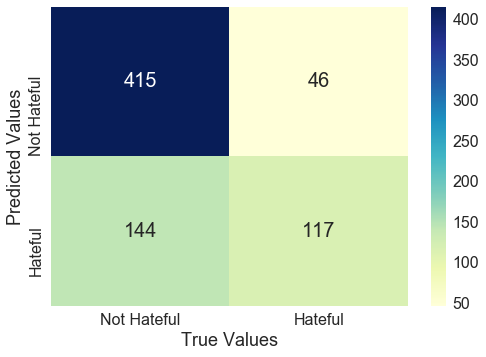

In [82]:
conf_matrix = confusion_matrix(test_labels_2, pred_label)
print_metrices(conf_matrix)

# bidirectional

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM

bilstm = Sequential()

bilstm.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(1,768)))#return_sequences=True argument is set to ensure that the output of the first LSTM layer 
bilstm.add(Bidirectional(LSTM(32)))
bilstm.add(Dense(1, activation='sigmoid'))

bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
bilstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 128)           426496    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 467,777
Trainable params: 467,777
Non-trainable params: 0
_________________________________________________________________


In [84]:
bilstm.fit(train_features_reshaped, train_labels, epochs=10, batch_size=32, validation_data=(y_val_features_3d, y_val_labels))

Epoch 1/10
181/181 [==============================] - 6s 11ms/step - loss: 0.6250 - accuracy: 0.6630 - val_loss: 0.6019 - val_accuracy: 0.6846
Epoch 2/10
181/181 [==============================] - 1s 5ms/step - loss: 0.5904 - accuracy: 0.6981 - val_loss: 0.5780 - val_accuracy: 0.7095
Epoch 3/10
181/181 [==============================] - 1s 5ms/step - loss: 0.5781 - accuracy: 0.7035 - val_loss: 0.5649 - val_accuracy: 0.7192
Epoch 4/10
181/181 [==============================] - 1s 5ms/step - loss: 0.5678 - accuracy: 0.7147 - val_loss: 0.5839 - val_accuracy: 0.6985
Epoch 5/10
181/181 [==============================] - 1s 5ms/step - loss: 0.5724 - accuracy: 0.7085 - val_loss: 0.5629 - val_accuracy: 0.7344
Epoch 6/10
181/181 [==============================] - 1s 5ms/step - loss: 0.5612 - accuracy: 0.7159 - val_loss: 0.5603 - val_accuracy: 0.7261
Epoch 7/10
181/181 [==============================] - 1s 5ms/step - loss: 0.5563 - accuracy: 0.7140 - val_loss: 0.5647 - val_accuracy: 0.7192
Epoch

In [85]:
test_loss, test_acc = bilstm.evaluate(test_features_reshape, test_labels_2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

23/23 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.7064
Test loss: 0.5932667255401611
Test accuracy: 0.7063711881637573


# Saving models in disk

In [91]:
#import pickle

# Assuming you have a trained model named 'model'
#model = lr_clf

# Save the model as a pickle file
#with open('lr_clf1.pkl', 'wb') as file:
    #pickle.dump(model, file)

In [93]:
#to preserve the functionality of model
# Assuming you have a trained model named 'model'
#model = bilstm

# Save the model using TensorFlow's model saving method
#model.save('bilstm.h5')

# Load the model
#loaded_model = tf.keras.models.load_model('bilstm.h5')


# for example

In [110]:
# load Inception model
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
inception = InceptionV3(weights='imagenet')

In [112]:
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
x = img_to_array(image.load_img('image.jpg', target_size=(299,299))) #convert grey scale of RGB array of (0,255)
x = np.array([x]) # converting into list of each x
x = preprocess_input(x) #normalize and remove RGB mean range btw[-1,1]
preds = inception.predict(x)# predcting probabilty of each calss for the x
predicted = decode_predictions(preds, top = 5)[0]

In [113]:
data ="You are too soft"
for j in range(0, 5):
    data=data+" "+predicted[j][1]

In [114]:
dict={'text':[data]}
df = pd.DataFrame(dict)# creating a dataframe

In [115]:
df['text']

0    You are too soft porcupine echidna wild_boar hog skunk
Name: text, dtype: object

In [116]:
tokenized = df['text'].apply((lambda x: tokenize.encode(str(x), add_special_tokens=True)))# work with daatframe
    
padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
    
    
    # Extract Attention Masks(tell which token to ignore and to process in form of 0 and 1 for bert model)
attention_mask = np.where(padded != 0, 1, 0)

    # Here we just convert the data to tensors
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

    # no gradient while forwarding propagation
with torch.no_grad():
    last_hidden_states = bert_model(input_ids, attention_mask=attention_mask)

    # Extracting features of the CLS tokens
feat = last_hidden_states[0][:,0,:].numpy()

In [117]:
feat

array([[-5.18614769e-01, -3.64146754e-02, -1.36616632e-01,
        -1.78845108e-01, -4.76281136e-01, -1.90157786e-01,
         5.16464114e-01,  9.94468808e-01, -3.15183401e-01,
         2.26513177e-01,  1.95291594e-01,  4.72990870e-01,
        -9.11121294e-02,  4.49635148e-01,  2.08387390e-01,
         4.76476043e-01, -4.99904454e-01,  3.02723318e-01,
         8.43877196e-01,  1.57614365e-01,  7.05435798e-02,
        -7.43011415e-01, -4.30793241e-02,  6.03130087e-03,
         3.20856780e-01, -2.62332380e-01,  1.34271711e-01,
         2.46067256e-01,  6.51196122e-01, -1.27215028e-01,
         1.64565399e-01,  2.89577514e-01,  6.16325662e-02,
        -3.04581970e-03,  3.61174852e-01, -3.32573593e-01,
         3.70184481e-01, -3.43049049e-01,  2.33247504e-01,
         4.46974814e-01, -4.58732992e-01,  3.07818115e-01,
         5.59497952e-01, -1.75587490e-01,  2.65560180e-01,
        -2.11582765e-01, -2.66633773e+00, -8.72117952e-02,
         2.69190848e-01, -5.44557869e-01,  5.86612880e-0

In [94]:
def check(op):
    if op>= 0.44:
        op=1
    else:
        op=0;
    return op 

In [118]:
op1=check(lr_clf.predict(feat))#logistic model

In [119]:
op1

1

In [97]:
op2=check(svm.predict(feat))#SVM  model

In [111]:
op3=check(rfm.predict(feat))#rfm model

In [112]:
op4=check(knn.predict(feat))#KNN model

In [113]:
op5=check(ann.predict(feat))#ann model

In [114]:
feat_reshaped = np.reshape(feat, (-1, 1, 768)) # for 3d shape

In [115]:
op6=check(lstm.predict(feat_reshaped))#logistic model

In [98]:
op2

1

In [117]:
op7=check(bilstm.predict(feat_reshaped))#logistic model

# Testing part

In [120]:
print(op7)
print(op5)

print(op6)

1
1
1


In [1]:
#pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
